In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

The TOV Equations used are 
dm/dr = 4*r*pi^2*eps and
dp/dr = -(eps + p) * (G*m + 4*pi*r^3*G*p)/r(r-2G*m)

Using the bag model for the EOS, eps(p) = 3*p + 4*B^4 (B is given as 0.2 GeV)

Input parameters: p_0 (pressure at the center of the star), delta_r

In the function solve_TOV, we input delta_r and p at the center (p_0) and append lists of radius, mass, and pressure by integrating the TOV equations. This is repeated until p is close to zero at which point, the last value of r and m are the R and M of the neutron star.

I looped through various values of p_0 and I set delta_r to be 1. M and R are the lists of neutron star masses and radi with different p_0.

This information was obtained from lecture notes by Professor Romatschke

In [2]:
#gravitational constant
G = 6.6743 * 10**(-11)

In [3]:
#EOS
#B = 0.2 GeV
B = 0.2
def eps(p):
    return 3 * p + 4 * B**4

In [4]:
def solve_TOV(delta_r, p_0):
    #i is the iteration
    i = 0
    #stored variables
    r = [0]
    m = [0]
    p = [p_0]
    #check to see if the pressure is below the threshold
    while min(p) > 0.01:
        #append the list of r with the current value of r
        r.append(r[i] + delta_r)
        
        #append the list of m
        dmdr = 4 * np.pi * r[i+1]**2 * eps(p[i])
        #m[i+1] = m[i] + dr * dm/dr
        m.append(m[i] + delta_r * dmdr) 
        
        #append the list of p
        dpdr = -(eps(p[i])+p[i]) * (G*m[i]+4*np.pi*r[i+1]**3*G*p[i]) / (r[i+1]*(r[i+1]-2*G*m[i]))
        #p[i+1] = p[i] + dr * dp/dr
        p.append(p[i] + delta_r * dpdr)
        
        i += 1
    return(r, m, p)

In [5]:
p_0 = [0.1, 1, 10, 100, 1000, 10000, 100000]
R = np.zeros(len(p_0))
M = np.zeros(len(p_0))
P = np.zeros(len(p_0))

In [6]:
start = time.time()
for i in range(len(p_0)):
    r, m, p = solve_TOV(1, p_0[i])
    R[i], M[i], P[i] = max(r), max(m), min(p)
end = time.time()
print((end-start)/60, "m")

2.4154312292734783 m


In [7]:
print(R)
print(M)
print(P)
print(eps(P))

[102585.  81922.  83801.  87363.  85863.  85755.  86063.]
[3.69295949e+14 2.89071932e+14 2.62682577e+14 2.85153564e+14
 2.82637200e+14 2.79530344e+14 2.81050955e+14]
[0.00999981 0.00999977 0.00999982 0.00999982 0.00999991 0.00999996
 0.00999975]
[0.03639944 0.03639931 0.03639945 0.03639947 0.03639974 0.03639987
 0.03639925]


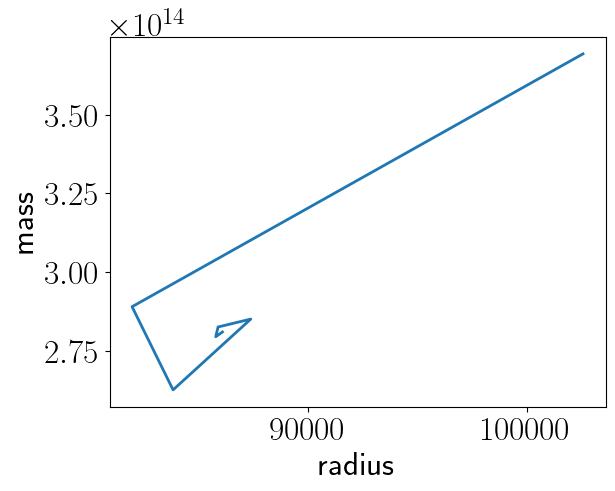

In [8]:
plt.xlabel("radius")
plt.ylabel("mass")
plt.plot(R, M)